In [9]:

import pandas as pd

from sklearn.datasets import load_breast_cancer, load_diabetes, load_iris, load_boston
diabetes_data = load_diabetes()
cancer_data = load_breast_cancer()
iris_data = load_iris()

In [91]:
diabetes_data.data

diabetes_data.target


diabetes_data.feature_names



['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

 # classificatio tasks (SVM and Decision tree)

#  IRIS 

## SVM



In [92]:
df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [93]:
df['target'] = iris_data.target
df['flower_name'] =df.target.apply(lambda x: iris_data.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [94]:
from sklearn.model_selection import train_test_split

X = df.drop(['target','flower_name'], axis='columns')
y = df.flower_name
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [95]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
pred=model.predict(X_test)


In [96]:
# Importing the dependancies
from sklearn import metrics


# Printing the precision and recall, among other metrics
print(metrics.classification_report(pred, y_test))
model.score(X_test, y_test)


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



0.9666666666666667

# IRIS
### DECISION TREE



In [97]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [31]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)

print("score :",dtree.score(X_test, y_test))

print("Classification report - \n", classification_report(y_test,y_pred))

score : 0.9333333333333333
Classification report - 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.89      0.89         9
   virginica       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



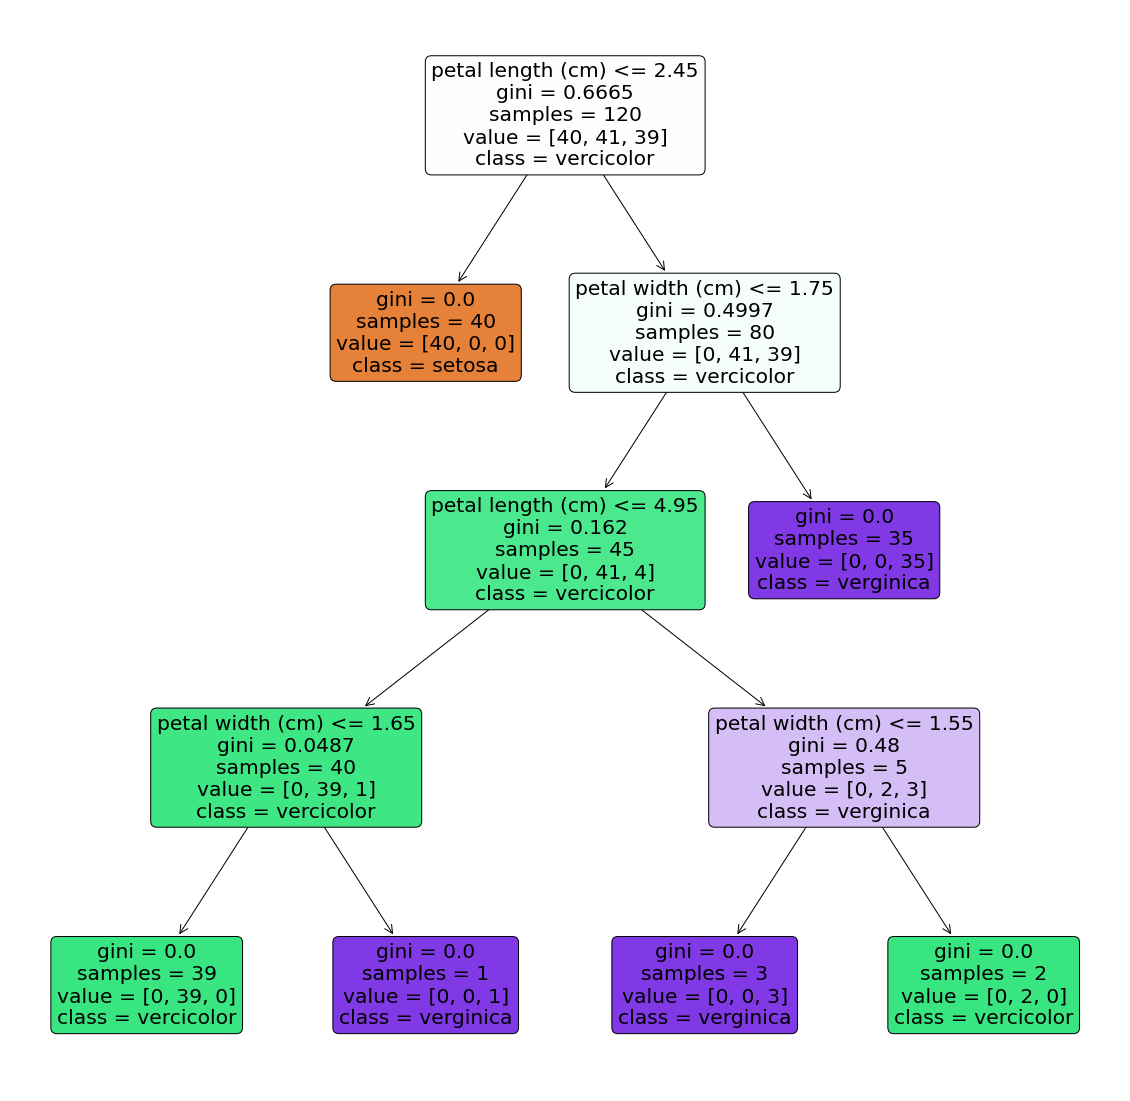

In [36]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
%matplotlib inline

# Visualising the graph without the use of graphviz
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df.columns, 
                     class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True)

# IRIS

### KMEANS



In [37]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [38]:
df1=df.drop(["target","flower_name"],axis=1)

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df1)
y_predicted



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [41]:
import numpy 
#y_predicted.unique()

(unique, counts) = numpy.unique(y_predicted, return_counts=True)
frequencies = numpy.asarray((unique, counts)).T

print(frequencies)

[[ 0 38]
 [ 1 50]
 [ 2 62]]


In [42]:
df.target.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

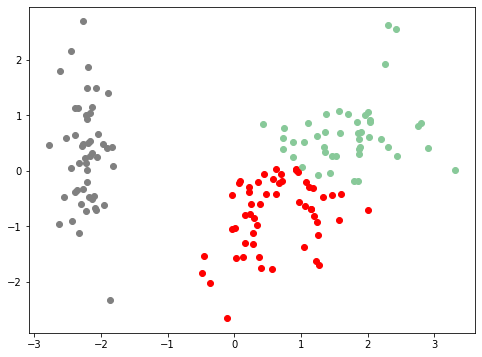

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df1)
scaled_data=scaler.transform(df1)
scaled_data

from sklearn.decomposition import PCA
pca=PCA(n_components=2)                  ########## MAKING IT INTO 3d
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
x_pca           
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(x_pca)
y_predicted    


colors = ["gray", "#88c999","red"]
plt.figure(figsize=(8,6))


for i in range(len(x_pca)):
    plt.scatter(x_pca[i][0], x_pca[i][1],c=colors[y_predicted[i]])
plt.show()

### KMEANS

##### DIABETEES

using deibetes to divide it into clusters

In [69]:
df = pd.DataFrame(diabetes_data.data,columns=diabetes_data.feature_names)
#df['target'] = diabetes_data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


C:\Users\ANTHONY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


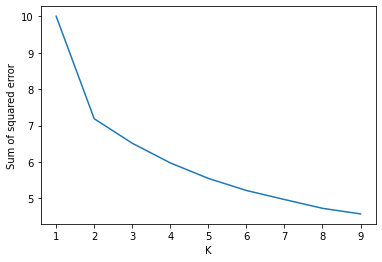

In [70]:
########## elbow technique

import matplotlib.pyplot as plt
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)         #########inertia_ finds sse
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [71]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df1)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

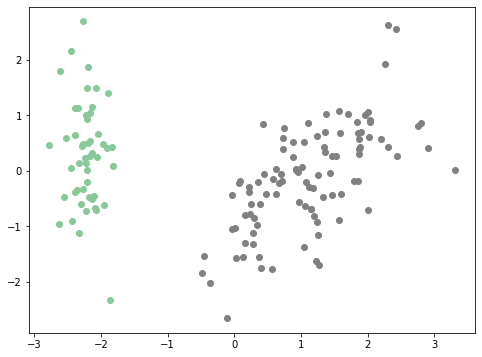

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df1)
scaled_data=scaler.transform(df1)
scaled_data

from sklearn.decomposition import PCA
pca=PCA(n_components=2)                  ########## MAKING IT INTO 3d
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
x_pca           
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(x_pca)
y_predicted    


colors = ["gray", "#88c999","red"]
plt.figure(figsize=(8,6))


for i in range(len(x_pca)):
    plt.scatter(x_pca[i][0], x_pca[i][1],c=colors[y_predicted[i]])
plt.show()

## SVM

#### CANCER

In [80]:
cancer_data = cancer_data = load_breast_cancer()

df = pd.DataFrame(cancer_data.data,columns=cancer_data.feature_names)
df['target'] = cancer_data.target

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [83]:
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis='columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
pred=model.predict(X_test)

# Importing the dependancies
from sklearn import metrics


# Printing the precision and recall, among other metrics
print(metrics.classification_report(pred, y_test))
model.score(X_test, y_test)


              precision    recall  f1-score   support

           0       0.74      0.91      0.82        35
           1       0.96      0.86      0.91        79

    accuracy                           0.88       114
   macro avg       0.85      0.89      0.86       114
weighted avg       0.89      0.88      0.88       114



0.8771929824561403

### DECISION TREE

#### CANCER

In [84]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [85]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

# Predicting the values of test data
y_pred = dtree.predict(X_test)

print("score :",dtree.score(X_test, y_test))

print("Classification report - \n", classification_report(y_test,y_pred))

Decision Tree Classifier Created
score : 0.9298245614035088
Classification report - 
               precision    recall  f1-score   support

           0       0.93      0.88      0.90        43
           1       0.93      0.96      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



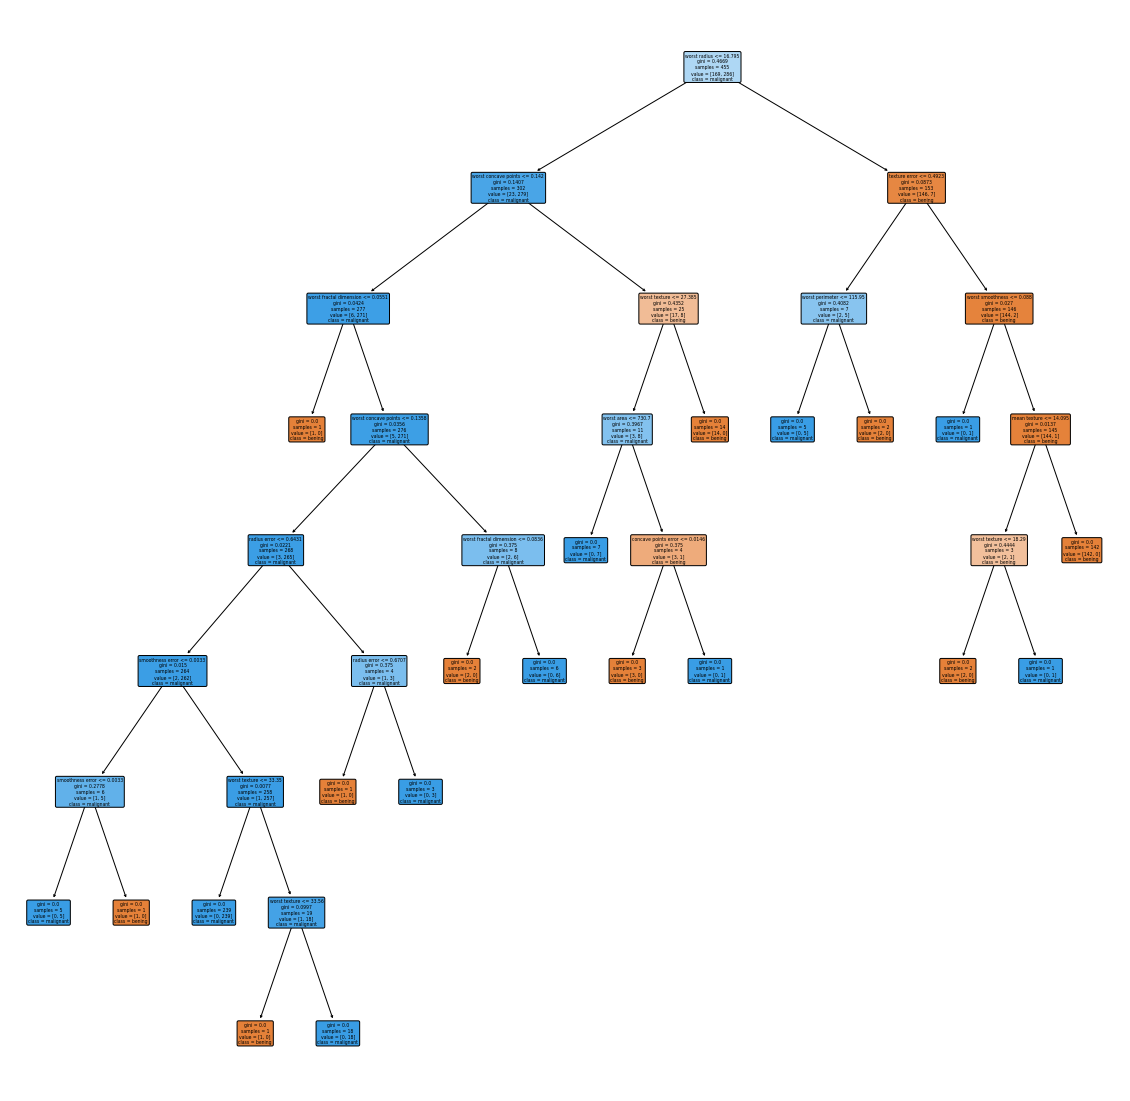

In [86]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
%matplotlib inline

# Visualising the graph without the use of graphviz
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df.columns, 
                     class_names =["bening", "malignant"] , filled = True , precision = 4, rounded = True)

### KMEANS

###### CANCER

In [87]:
df1 = pd.DataFrame(cancer_data.data,columns=cancer_data.feature_names)
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df1)
y_predicted

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

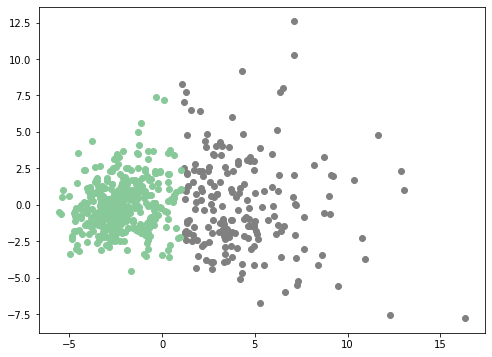

In [88]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df1)
scaled_data=scaler.transform(df1)
scaled_data

from sklearn.decomposition import PCA
pca=PCA(n_components=2)                  ########## MAKING IT INTO 3d
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
x_pca           
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(x_pca)
y_predicted    


colors = ["gray", "#88c999"]
plt.figure(figsize=(8,6))


for i in range(len(x_pca)):
    plt.scatter(x_pca[i][0], x_pca[i][1],c=colors[y_predicted[i]])
plt.show()